## Task 3: Feature Engineering Notebook

# Feature Engineering Pipeline
This notebook implements the feature engineering pipeline for the credit risk model.

## 1. Setup and Data Loading

In [16]:
import sys
sys.path.append("..")  # Add src directory to path
from src.data_processing import (
    DataLoader,
    RFMFeatureGenerator,
    BehavioralFeatureGenerator,
    TimeFeatureGenerator,
    create_feature_pipeline,
    process_data
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

In [17]:
# Initialize data loader
loader = DataLoader(file_path="../data/raw/data.csv")
df = loader.transform(None)

# Show raw data sample
print("Raw data sample:")
df.head()

Raw data sample:


,transactionid,batchid,accountid,subscriptionid,customerid,currencycode,countrycode,providerid,productid,productcategory,channelid,amount,value,transactionstarttime,pricingstrategy,fraudresult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


## 2. Feature Engineering Pipeline

In [18]:
# Initialize pipeline with proper timezone handling
pipeline = Pipeline([
    ('rfm', RFMFeatureGenerator(snapshot_date="2018-11-16")),  # Date from your dataset
    ('behavior', BehavioralFeatureGenerator()),
    ('time_features', TimeFeatureGenerator())
])

# Execute pipeline
processed_df = pipeline.fit_transform(df)

# Show engineered features
print("✅ Feature engineering complete!")
print("\nEngineered features sample:")
processed_df[['customerid', 'recency', 'frequency', 'monetary', 'rfm_cluster', 'is_high_risk']].head()

✅ Feature engineering complete!

Engineered features sample:


,customerid,recency,frequency,monetary,rfm_cluster,is_high_risk
5184,CustomerId_1,-6,1,10000.0,0,0
5178,CustomerId_10,-6,1,10000.0,0,0
1122,CustomerId_1001,-1,5,6080.0,0,0
1148,CustomerId_1001,-1,5,6080.0,0,0
1149,CustomerId_1001,-1,5,6080.0,0,0


## 3. Feature Analysis

In [19]:
# Analyze RFM features
rfm_features = processed_df[['recency', 'frequency', 'monetary', 'is_high_risk']]

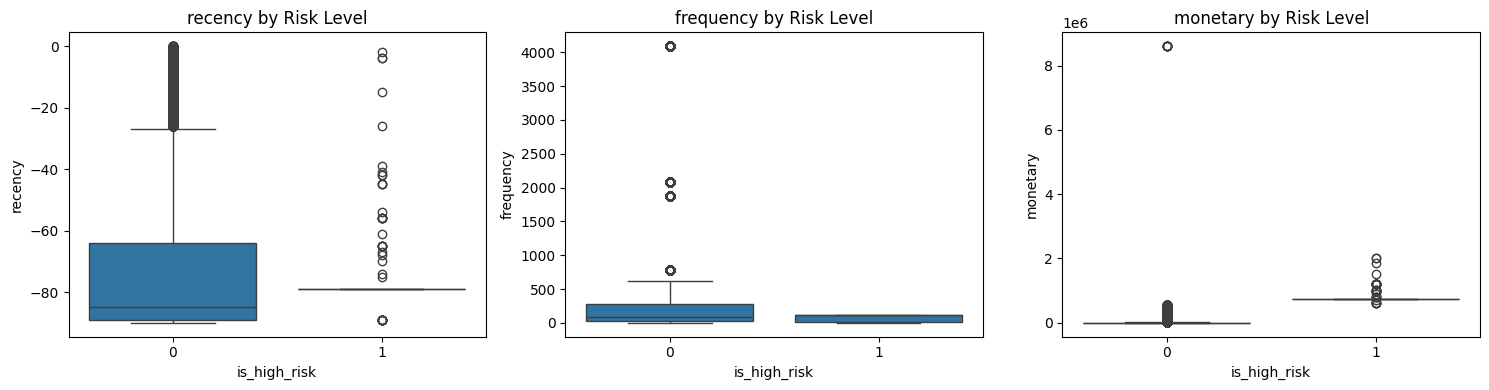

In [20]:
# Plot distributions
plt.figure(figsize=(15, 4))
for i, col in enumerate(['recency', 'frequency', 'monetary'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='is_high_risk', y=col, data=rfm_features)
    plt.title(f'{col} by Risk Level')
plt.tight_layout()
plt.show()

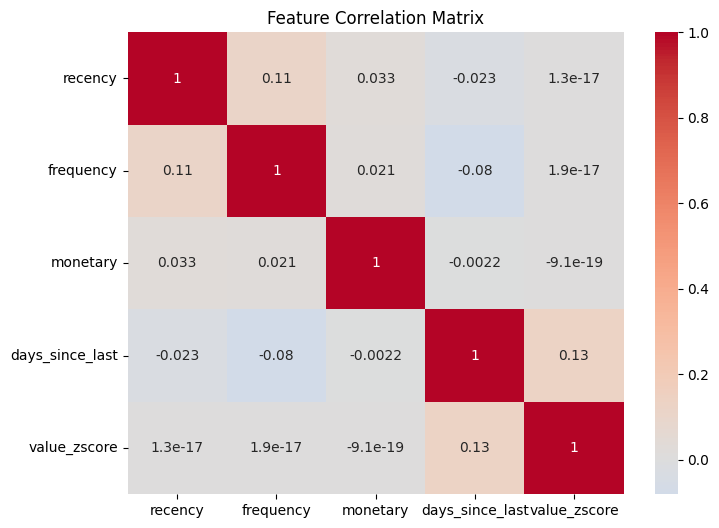

In [21]:
# Correlation analysis
corr_matrix = processed_df[['recency', 'frequency', 'monetary', 'days_since_last', 'value_zscore']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.show()

## 4. Final Processing Pipeline

In [22]:
# ⚙️ Create and test complete pipeline
complete_pipeline = create_feature_pipeline()

# Fit the pipeline first to establish feature names
complete_pipeline.fit(None)  # DataLoader handles input internally

# Now transform the data
final_features = complete_pipeline.transform(None)

# Get feature names
try:
    feature_names = complete_pipeline.get_feature_names_out()
    print("\nFinal feature matrix shape:", final_features.shape)
    print("\nFirst 10 feature names:", feature_names[:10])
except AttributeError:
    # Fallback for older scikit-learn versions
    print("\nFinal feature matrix shape:", final_features.shape)
    print("\nFeature names not available (requires scikit-learn 1.0+)")

# Save processed data
process_data(
    input_path="../data/raw/data.csv",
    output_path="../data/processed/model_features.csv"
)

AttributeError: 'numpy.ndarray' object has no attribute 'assign'